In [2]:
import numpy as np
import pandas as pd
import polars as pl
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pathlib
from pathlib import Path

directory_raw = str(Path.cwd().parent) + '/data_raw/'

directory_processed = str(Path.cwd().parent) + '/data/'
print(directory_raw)
print(directory_processed)

/Users/brentondickerson/git/breathe/data_raw/
/Users/brentondickerson/git/breathe/data/


In [3]:
def read_data(folder, file_name):
    data= pl.from_pandas(pd.read_csv(
        directory_processed + f"/{folder}/{file_name}", delimiter=","
    ))
    return data

def save_data(data, file_name):
    data.write_csv(directory_processed + file_name + ".csv")
    print(f"{file_name} has been saved at {directory_processed}{file_name}.")

In [5]:
import pandas as pd

usecols = [
    "state",                     # FIPS code for state
    "kfr_white_pooled_p50",      # White adult household income (from low-income households)
    "kfr_black_pooled_p50",      # Black adult household income
]

# Read only the needed columns
chunks = pd.read_csv(directory_raw + "tract_outcomes_early.csv", usecols=usecols, chunksize=100000)

# Aggregate by state
state_income = []
for chunk in chunks:
    grouped = chunk.groupby("state").mean(numeric_only=True).reset_index()
    state_income.append(grouped)

# Final aggregation
df_state_income = pd.concat(state_income).groupby("state").mean().reset_index()
list = [72]
df_state_income = df_state_income[~df_state_income["state"].isin(list)]


In [6]:
import us

# Step 1: Convert state FIPS to zero-padded string
df_state_income["state_fips_str"] = df_state_income["state"].apply(lambda x: str(int(x)).zfill(2))

# Step 2: Lookup state names
df_state_income["State"] = df_state_income["state_fips_str"].apply(
    lambda x: us.states.lookup(x).name if us.states.lookup(x) else None
)

# Step 3: Drop rows with missing states (just in case)
df_state_income = df_state_income[df_state_income["State"].notnull()].copy()

# Step 4: Lookup state abbreviations
df_state_income["State Abbr"] = df_state_income["State"].apply(
    lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None
)

In [ ]:

# Read only the needed columns
chunks = pd.read_csv(directory_raw + "tract_outcomes_early.csv", usecols=usecols, chunksize=100000)

# Aggregate by state
state_income = []
for chunk in chunks:
    grouped = chunk.groupby("state").mean(numeric_only=True).reset_index()
    state_income.append(grouped)

# Final aggregation
df_state_income = pd.concat(state_income).groupby("state").mean().reset_index()
list = [72]
df_state_income = df_state_income[~df_state_income["state"].isin(list)]

import us

# Step 1: Convert state FIPS to zero-padded string
df_state_income["state_fips_str"] = df_state_income["state"].apply(lambda x: str(int(x)).zfill(2))

# Step 2: Lookup state names
df_state_income["State"] = df_state_income["state_fips_str"].apply(
    lambda x: us.states.lookup(x).name if us.states.lookup(x) else None
)

# Step 3: Drop rows with missing states (just in case)
df_state_income = df_state_income[df_state_income["State"].notnull()].copy()

# Step 4: Lookup state abbreviations
df_state_income["State Abbr"] = df_state_income["State"].apply(
    lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None
)

# Calculate the income gap between White and Black individuals
df_state_income["White - Black Gap"] = (
    df_state_income["kfr_white_pooled_p50"] - df_state_income["kfr_black_pooled_p50"]
)

# Create updated choropleth
fig = px.choropleth(
    df_state_income,
    locations="State Abbr",
    locationmode="USA-states",
    color="White - Black Gap",
    scope="usa",
    color_continuous_scale="Reds",
    title="White vs Black Household Income Gap by State (Mainstreet)",
    labels={"White - Black Gap": "Income Gap ($)"}
)

fig.show()


,state,kfr_black_pooled_p50,kfr_white_pooled_p50,state_fips_str,State,State Abbr
0,1,0.379366,0.499145,01,Alabama,AL
1,2,0.388902,0.473708,02,Alaska,AK
2,4,0.382222,0.506120,04,Arizona,AZ
3,5,0.385896,0.500884,05,Arkansas,AR
4,6,0.385595,0.523678,06,California,CA
5,8,0.403175,0.535144,08,Colorado,CO
6,9,0.408350,0.546344,09,Connecticut,CT
7,10,0.392546,0.508749,10,Delaware,DE
9,12,0.384377,0.491648,12,Florida,FL
10,13,0.373217,0.495319,13,Georgia,GA


In [105]:
# Calculate the income gap between White and Black individuals
df_state_income["White - Black Gap"] = (
    df_state_income["kfr_white_pooled_p50"] - df_state_income["kfr_black_pooled_p50"]
)


In [107]:
# Create updated choropleth
fig = px.choropleth(
    df_state_income,
    locations="State Abbr",
    locationmode="USA-states",
    color="White - Black Gap",
    scope="usa",
    color_continuous_scale="Reds",
    title="White vs Black Household Income Gap by State (Mainstreet)",
    labels={"White - Black Gap": "Income Gap ($)"}
)

fig.show()

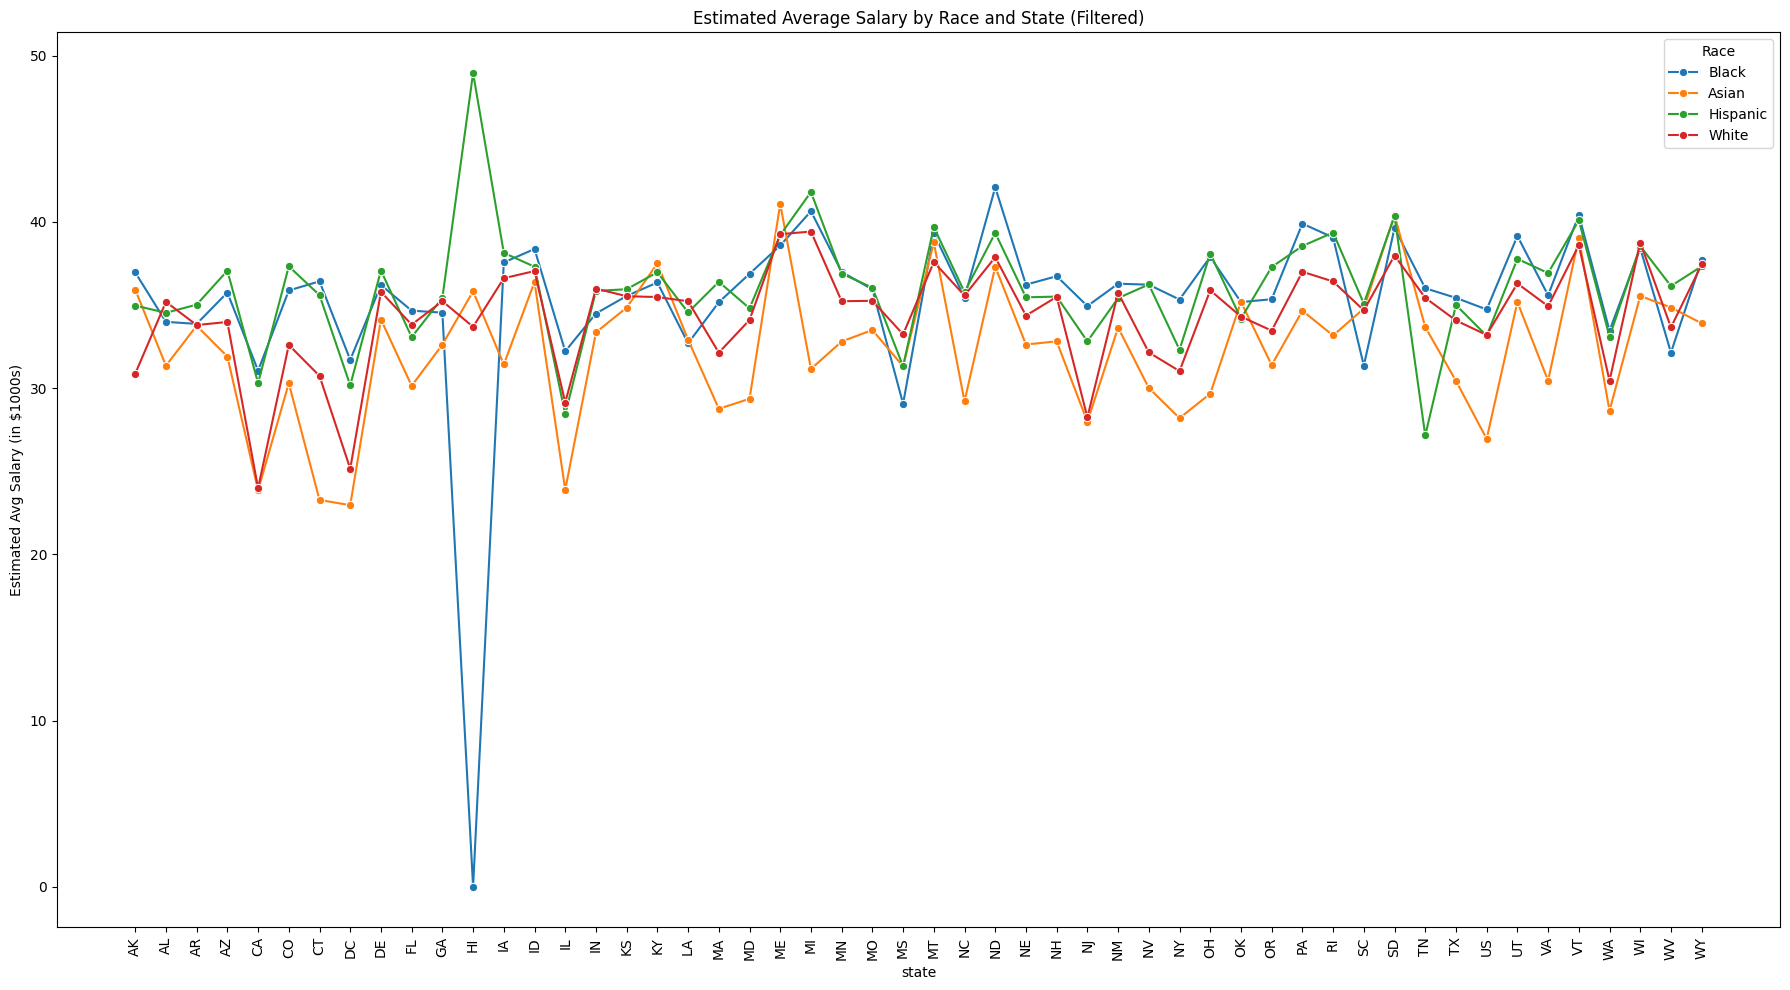

In [108]:
valid_races = ["White", "Black", "Asian", "Hispanic"]

# Filter the dataframe
filtered_df = plot_df[plot_df["data_type"].isin(valid_races)]

# Sort state alphabetically
filtered_df = filtered_df.sort_values("state")

# Create the plot
plt.figure(figsize=(18, 10))
sns.lineplot(data=filtered_df, x="state", y="avg_salary", hue="data_type", marker="o")

plt.xticks(rotation=90)
plt.ylabel("Estimated Avg Salary (in $1000s)")
plt.title("Estimated Average Salary by Race and State (Filtered)")
plt.legend(title="Race")
plt.tight_layout()
plt.show()

In [109]:
# Convert salary bracket to midpoint
def bracket_to_midpoint(bracket):
    try:
        low, high = map(float, bracket.split("-"))
        return (low + high) / 2
    except:
        return None

df = df.filter(
    pl.col("bracket").is_not_null() &
    pl.col("value").is_not_null() &
    pl.col("state").is_not_null() &
    pl.col("emp_type").is_in(pl.lit('FT'))
).with_columns([
    pl.col("bracket").map_elements(bracket_to_midpoint).alias("bracket_mid"),
    (pl.col("value") * pl.col("bracket").map_elements(bracket_to_midpoint)).alias("estimated_total_salary")
])

# -----------------------------
# Aggregate by state and race
# -----------------------------
agg = df.group_by(["state", "data_type"]).agg([
    pl.sum("estimated_total_salary").alias("total_salary"),
    pl.sum("value").alias("total_people")
]).with_columns([
    (pl.col("total_salary") / pl.col("total_people")).alias("avg_salary")
])

# Convert to pandas for plotting
plot_df = agg.to_pandas()

# -----------------------------
# Filter and annotate
# -----------------------------
# Focus on 4 common races
valid_races = ["White", "Black", "Asian", "Hispanic"]
plot_df = plot_df[plot_df["data_type"].isin(valid_races)]

# Filter out states with < 1000 employees
state_totals = plot_df.groupby("state")["total_people"].sum().reset_index()
valid_states = state_totals[state_totals["total_people"] >= 1000]["state"]
plot_df = plot_df[plot_df["state"].isin(valid_states)].copy()

# Add affirmative action policy labels
banned_states = ["CA", "WA", "MI", "NE", "AZ", "OK", "FL", "ID", "NH"]
pro_states = ["NY", "IL", "OR", "CO", "MN", "MA", "NJ", "CT", "HI"]

def classify_policy(state):
    if state in banned_states:
        return "Banned"
    elif state in pro_states:
        return "Pro"
    else:
        return "Neutral"

plot_df["policy_status"] = plot_df["state"].apply(classify_policy)

# Sort states for consistent x-axis
ordered_states = sorted(plot_df["state"].unique())
plot_df["state"] = pd.Categorical(plot_df["state"], categories=ordered_states, ordered=True)

# -----------------------------
# Plotting
# -----------------------------
race_palette = {
    "White": "#1f77b4",    # Blue
    "Black": "#d62728",    # Red
    "Asian": "#2ca02c",    # Green
    "Hispanic": "#ff7f0e", # Orange
}

plt.figure(figsize=(20, 10))
ax = sns.barplot(
    data=plot_df,
    x="state",
    y="avg_salary",
    hue="data_type",
    palette=race_palette
)

# Highlight policy status with background shading
for i, state in enumerate(ordered_states):
    status = classify_policy(state)
    if status == "Banned":
        ax.axvspan(i - 0.5, i + 0.5, color='lightgray', alpha=0.3)
    elif status == "Pro":
        ax.axvspan(i - 0.5, i + 0.5, color='lightgreen', alpha=0.2)

# Final formatting
plt.xticks(rotation=90)
plt.ylabel("Estimated Avg Salary (in $1000s)")
plt.xlabel("State")
plt.title("Estimated Average Salary by Race and State\nShaded: Banned (Gray) | Pro (Green)")
plt.legend(title="Race")
plt.tight_layout()
plt.show()


TypeError: Index(...) must be called with a collection of some kind, <Expr ['[([([(col("bracket").is_not_nu…'] at 0x16B41C9D0> was passed

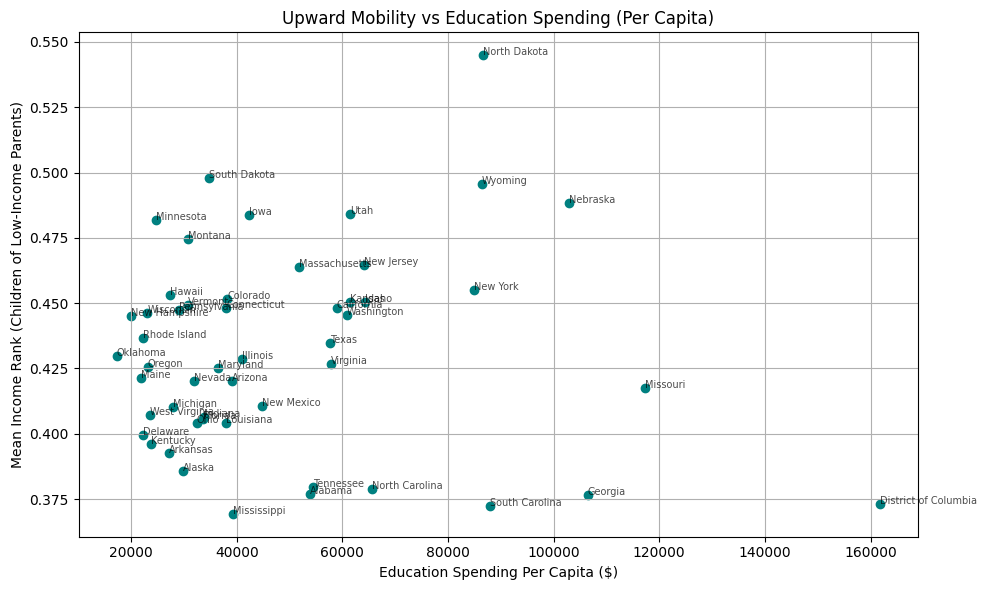

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your datasets
df_spending = pd.read_csv(directory_raw + "per_capita_spending_by_state.csv")  # education/prison spending
df_mobility = pd.read_csv(directory_raw + "tract_outcomes_state.csv")  # Opportunity Atlas state mobility

# --- FIPS to State Mapping (manually embedded) ---
fips_to_state = {
    1: "Alabama", 2: "Alaska", 4: "Arizona", 5: "Arkansas", 6: "California",
    8: "Colorado", 9: "Connecticut", 10: "Delaware", 11: "District of Columbia",
    12: "Florida", 13: "Georgia", 15: "Hawaii", 16: "Idaho", 17: "Illinois",
    18: "Indiana", 19: "Iowa", 20: "Kansas", 21: "Kentucky", 22: "Louisiana",
    23: "Maine", 24: "Maryland", 25: "Massachusetts", 26: "Michigan", 27: "Minnesota",
    28: "Mississippi", 29: "Missouri", 30: "Montana", 31: "Nebraska", 32: "Nevada",
    33: "New Hampshire", 34: "New Jersey", 35: "New Mexico", 36: "New York",
    37: "North Carolina", 38: "North Dakota", 39: "Ohio", 40: "Oklahoma", 41: "Oregon",
    42: "Pennsylvania", 44: "Rhode Island", 45: "South Carolina", 46: "South Dakota",
    47: "Tennessee", 48: "Texas", 49: "Utah", 50: "Vermont", 51: "Virginia",
    53: "Washington", 54: "West Virginia", 55: "Wisconsin", 56: "Wyoming"
}

# Map FIPS to state name
df_mobility["State"] = df_mobility["state"].map(fips_to_state)

# Rename mobility column for clarity
df_mobility = df_mobility.rename(columns={"kfr_pooled_pooled_p25": "Upward Mobility (P25 Income Rank)"})

# Merge spending and mobility datasets
df_merged = df_spending.merge(df_mobility, on="State", how="inner")

# --- Plot: Education Spending vs Upward Mobility ---
plt.figure(figsize=(10, 6))
plt.scatter(df_merged["Education Per Capita ($)"], df_merged["Upward Mobility (P25 Income Rank)"], color='teal')
plt.title("Upward Mobility vs Education Spending (Per Capita)")
plt.xlabel("Education Spending Per Capita ($)")
plt.ylabel("Mean Income Rank (Children of Low-Income Parents)")
plt.grid(True)

# Annotate each point with the state name
for _, row in df_merged.iterrows():
    plt.annotate(row["State"], (row["Education Per Capita ($)"], row["Upward Mobility (P25 Income Rank)"]),
                 fontsize=7, alpha=0.7)

plt.tight_layout()
plt.show()


In [123]:
df_merged["Mobility Efficiency Score"] = (
    (df_merged["Upward Mobility (P25 Income Rank)"] /
    df_merged["Education Per Capita ($)"] ) * 10000
)
df_merged["State Abbr"] = df_merged["State"].apply(
    lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None
)

In [125]:
import plotly.express as px

fig = px.choropleth(
    df_merged,
    locations="State Abbr",
    locationmode="USA-states",
    color="Mobility Efficiency Score",
    color_continuous_scale="YlGnBu",
    scope="usa",
    title="Mobility Efficiency Score by State (Mobility per $10k Education Spending)",
    labels={"Mobility Efficiency Score": "Mobility / $"}
)
fig.show()


In [117]:
import pandas as pd
import plotly.express as px
import us  # pip install us if needed

# Load data
df_spending = pd.read_csv(directory_raw + "per_capita_spending_by_state.csv")
df_mobility = pd.read_csv(directory_raw + "tract_outcomes_state.csv")

# FIPS to state mapping
fips_to_state = {
    1: "Alabama", 2: "Alaska", 4: "Arizona", 5: "Arkansas", 6: "California",
    8: "Colorado", 9: "Connecticut", 10: "Delaware", 11: "District of Columbia",
    12: "Florida", 13: "Georgia", 15: "Hawaii", 16: "Idaho", 17: "Illinois",
    18: "Indiana", 19: "Iowa", 20: "Kansas", 21: "Kentucky", 22: "Louisiana",
    23: "Maine", 24: "Maryland", 25: "Massachusetts", 26: "Michigan", 27: "Minnesota",
    28: "Mississippi", 29: "Missouri", 30: "Montana", 31: "Nebraska", 32: "Nevada",
    33: "New Hampshire", 34: "New Jersey", 35: "New Mexico", 36: "New York",
    37: "North Carolina", 38: "North Dakota", 39: "Ohio", 40: "Oklahoma", 41: "Oregon",
    42: "Pennsylvania", 44: "Rhode Island", 45: "South Carolina", 46: "South Dakota",
    47: "Tennessee", 48: "Texas", 49: "Utah", 50: "Vermont", 51: "Virginia",
    53: "Washington", 54: "West Virginia", 55: "Wisconsin", 56: "Wyoming"
}
df_mobility["State"] = df_mobility["state"].map(fips_to_state)
df_mobility = df_mobility.rename(columns={"kfr_pooled_pooled_p25": "Upward Mobility (P25 Income Rank)"})

# Merge both datasets
df_merged = df_spending.merge(df_mobility, on="State", how="inner")

# Add state abbreviations for plotting
df_merged["State Abbr"] = df_merged["State"].map(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None)

# Plot heatmap by upward mobility rank
fig = px.choropleth(
    df_merged,
    locations="State Abbr",
    locationmode="USA-states",
    color="Upward Mobility (P25 Income Rank)",
    scope="usa",
    color_continuous_scale="Purples",
    title="Upward Mobility of Children from Low-Income Families by State"
)
fig.show()


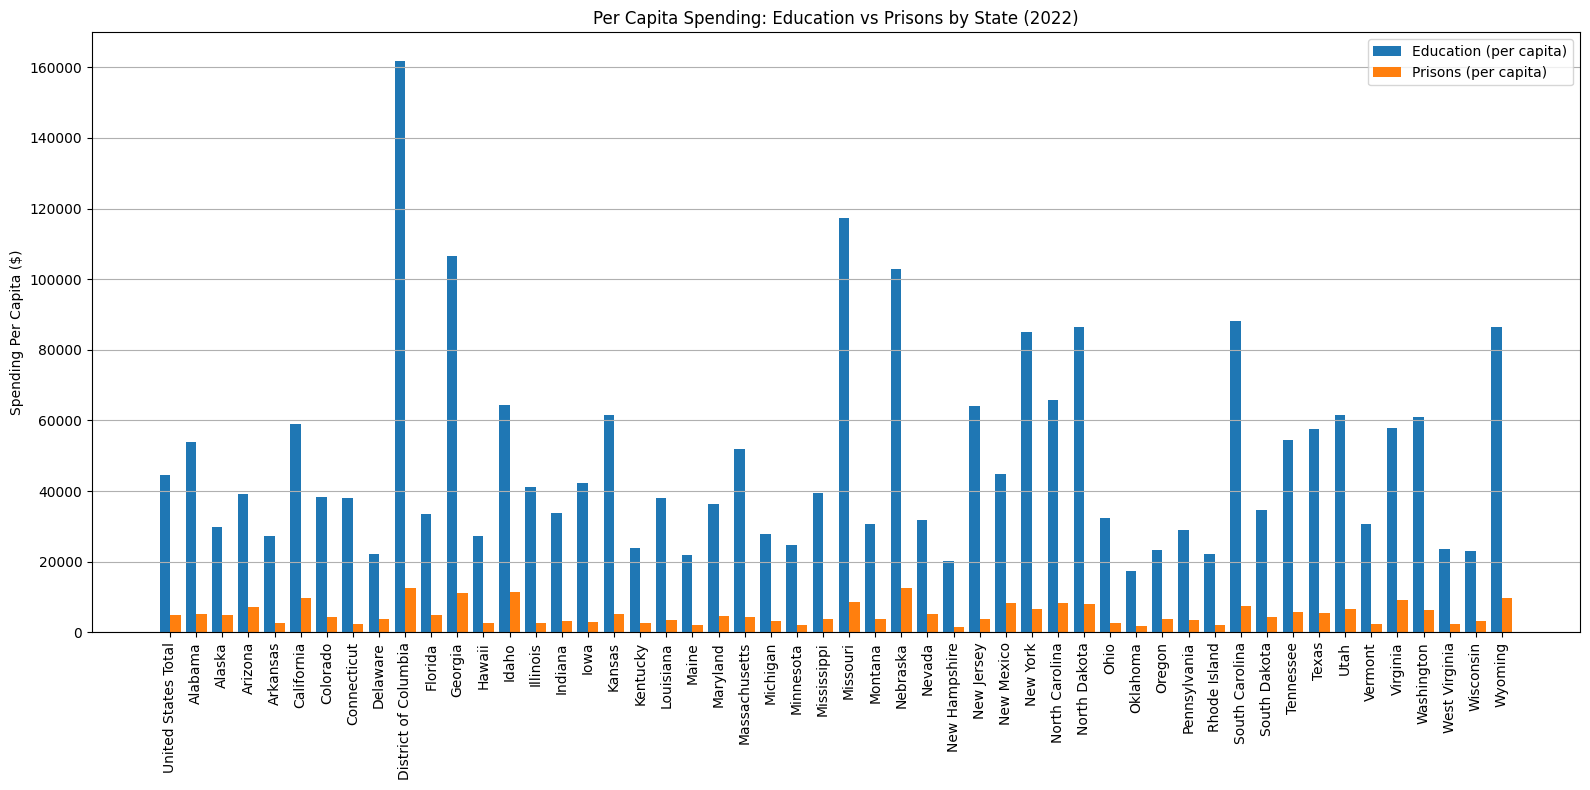

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
excel_path = "22slsstab1.xlsx"  # Replace with full path if needed
xls = pd.ExcelFile(directory_raw + excel_path)
# Step 1: Load row 9 only (actual state names row)
df_headers = pd.read_excel(xls, sheet_name="2022_US_WY", nrows=9)
state_row = df_headers.iloc[7]  # Row with real state names

# Extract state names from every 5th column starting at index 2
raw_state_names = state_row[2:].values[::5]
state_names = [s for s in raw_state_names if isinstance(s, str)]

# Step 2: Load the actual data starting from row 10
df = pd.read_excel(xls, sheet_name="2022_US_WY", skiprows=10)

# === Helper to Extract Every 5th Column for Each State ===
def extract_row_values(df, row_index, start_col=2, step=5, state_count=None):
    row = df.iloc[row_index]
    values = row[start_col::step].astype(float).values
    return values[:state_count] if state_count else values

# === Define Row Indexes ===
ROW_EDU = 88      # "Elementary & secondary"
ROW_PRISON = 112  # "Correction"
ROW_POP = 20      # Population

# === Extract and Normalize ===
edu_spending = extract_row_values(df, ROW_EDU, state_count=len(state_names))
prison_spending = extract_row_values(df, ROW_PRISON, state_count=len(state_names))
populations = extract_row_values(df, ROW_POP, state_count=len(state_names))

edu_per_capita = [(e * 1000) / p for e, p in zip(edu_spending, populations)]
prison_per_capita = [(c * 1000) / p for c, p in zip(prison_spending, populations)]

# === Create Final Clean DataFrame ===
df_states = pd.DataFrame({
    "State": state_names,
    "Education Per Capita ($)": edu_per_capita,
    "Prison Per Capita ($)": prison_per_capita
})

# Optional: Save to CSV
df_states.to_csv("per_capita_spending_by_state.csv", index=False)

# === Plot ===
x = range(len(state_names))
bar_width = 0.4

plt.figure(figsize=(16, 8))
plt.bar(x, edu_per_capita, width=bar_width, label="Education (per capita)")
plt.bar([i + bar_width for i in x], prison_per_capita, width=bar_width, label="Prisons (per capita)")

plt.xticks([i + bar_width / 2 for i in x], state_names, rotation=90)
plt.ylabel("Spending Per Capita ($)")
plt.title("Per Capita Spending: Education vs Prisons by State (2022)")
plt.legend()
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

In [17]:
df_states["Total Per Capita ($)"] = df_states["Education Per Capita ($)"] + df_states["Prison Per Capita ($)"]
df_states["Education % of Total"] = (df_states["Education Per Capita ($)"] / df_states["Total Per Capita ($)"]) * 100


In [21]:
import us  # pip install us if needed

df_states["State Abbr"] = df_states["State"].map(lambda name: us.states.lookup(name).abbr if us.states.lookup(name) else None)


In [22]:
import plotly.express as px

fig = px.choropleth(
    df_states,
    locations="State Abbr",
    locationmode="USA-states",
    color="Education % of Total",
    scope="usa",
    color_continuous_scale="Viridis",
    labels={"Education % of Total": "% to Education"},
    title="Percentage of Per Capita Spending Allocated to Education vs Prison (2022)"
)

fig.show()


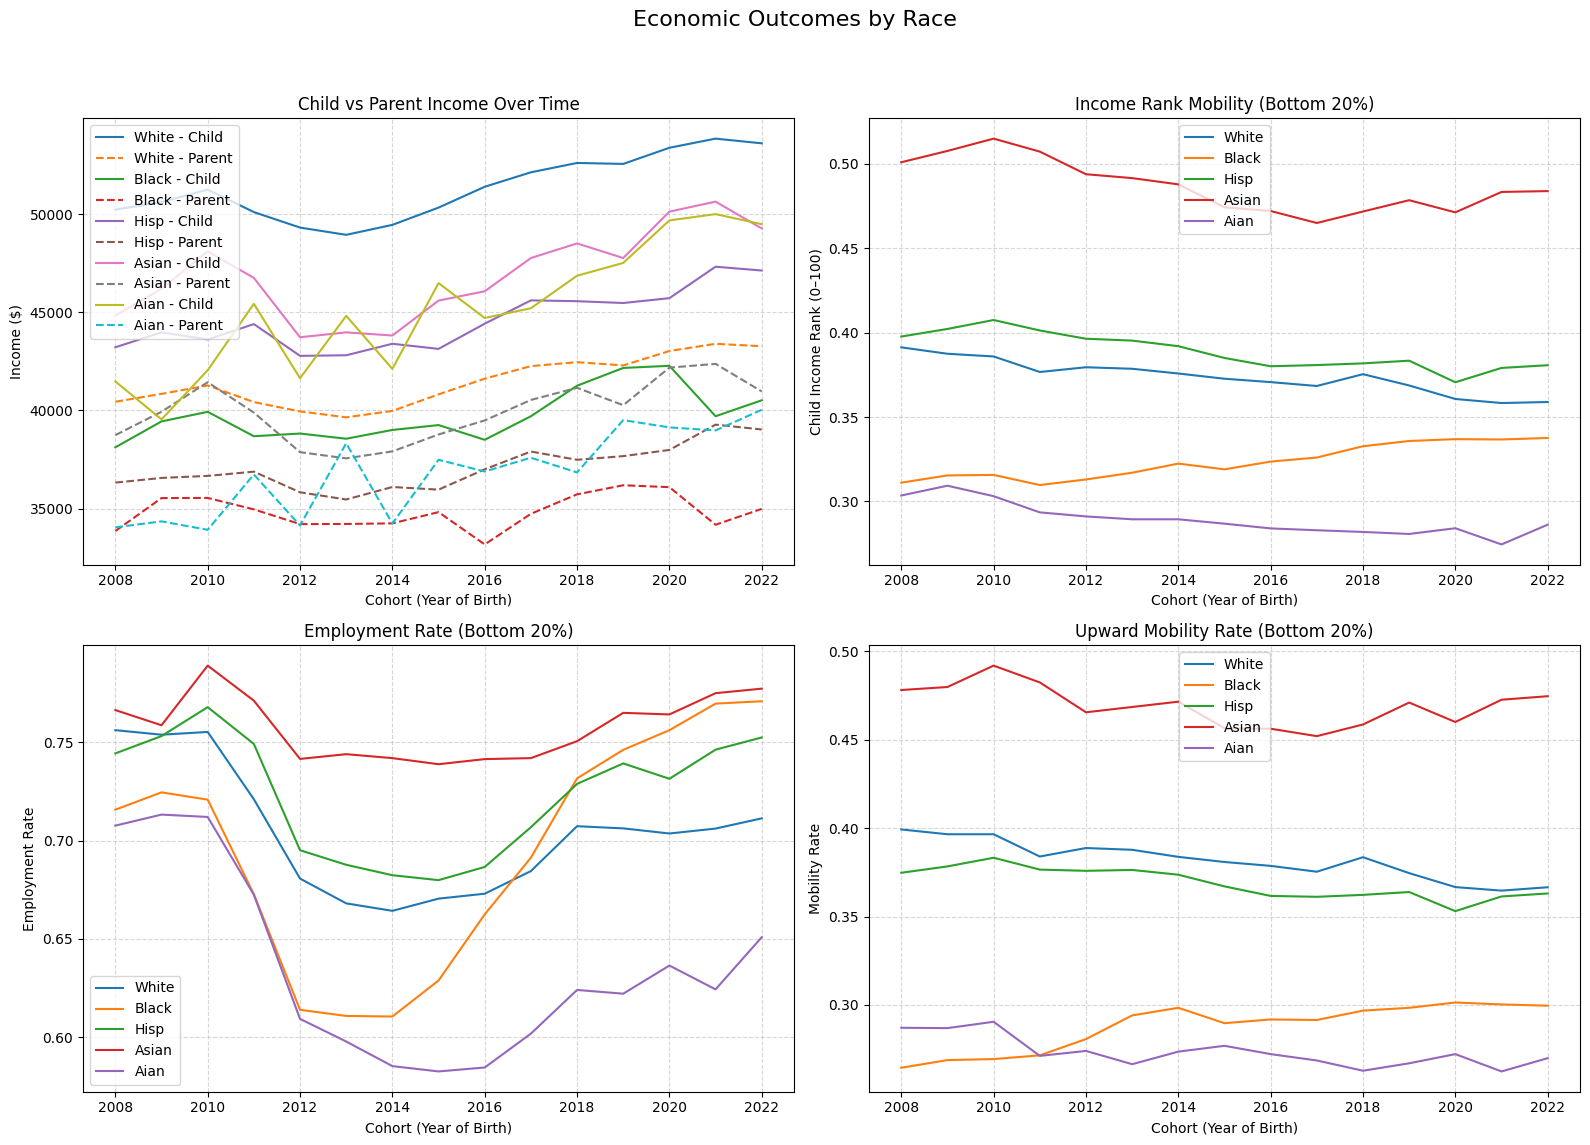

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
races = ["white", "black", "hisp", "asian", "aian"]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Economic Outcomes by Race", fontsize=16)

# Plot 1: Child vs Parent Income
ax = axs[0, 0]
for race in races:
    ax.plot(income_demographics["cohort"], income_demographics[f"kfi_{race}_pooled_p100"], label=f"{race.capitalize()} - Child")
    ax.plot(income_demographics["cohort"], income_demographics[f"kii_{race}_pooled_p100"], linestyle="--", label=f"{race.capitalize()} - Parent")
ax.set_title("Child vs Parent Income Over Time")
ax.set_xlabel("Cohort (Year of Birth)")
ax.set_ylabel("Income ($)")
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend()

# Plot 2: Income Rank Mobility
ax = axs[0, 1]
for race in races:
    ax.plot(income_demographics["cohort"], income_demographics[f"kir_{race}_pooled_p1"], label=race.capitalize())
ax.set_title("Income Rank Mobility (Bottom 20%)")
ax.set_xlabel("Cohort (Year of Birth)")
ax.set_ylabel("Child Income Rank (0–100)")
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend()

# Plot 3: Employment Rate
ax = axs[1, 0]
for race in races:
    ax.plot(income_demographics["cohort"], income_demographics[f"emp_{race}_pooled_p1"], label=race.capitalize())
ax.set_title("Employment Rate (Bottom 20%)")
ax.set_xlabel("Cohort (Year of Birth)")
ax.set_ylabel("Employment Rate")
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend()

# Plot 4: Upward Mobility Rate
ax = axs[1, 1]
for race in races:
    ax.plot(income_demographics["cohort"], income_demographics[f"kfr_{race}_pooled_p1"], label=race.capitalize())
ax.set_title("Upward Mobility Rate (Bottom 20%)")
ax.set_xlabel("Cohort (Year of Birth)")
ax.set_ylabel("Mobility Rate")
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [37]:
races = ["white", "black", "hisp", "asian", "aian"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
fig = go.Figure()

for i, race in enumerate(races):
    fig.add_trace(go.Scatter(
        x=income_demographics["cohort"],
        y=income_demographics[f"kfi_{race}_pooled_p100"],
        name=f"{race.capitalize()} - Child",
        mode="lines",
        line=dict(color=colors[i], width=3)
    ))
    fig.add_trace(go.Scatter(
        x=income_demographics["cohort"],
        y=income_demographics[f"kii_{race}_pooled_p100"],
        name=f"{race.capitalize()} - Parent",
        mode="lines",
        line=dict(color=colors[i], width=3, dash="dash")
    ))

fig.update_layout(
    title="<b>Child vs Parent Income Over Time</b>",
    xaxis_title="Cohort (Year of Birth)",
    yaxis_title="Income ($)",
    template="plotly_white",
    font=dict(size=14),
    legend=dict(orientation="h", yanchor="bottom", y=-0.70, xanchor="center", x=0.5)
)

In [30]:
races = ["white", "black", "hisp", "asian", "aian"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
fig = go.Figure()

for i, race in enumerate(races):
    fig.add_trace(go.Scatter(
        x=income_demographics["cohort"],
        y=income_demographics[f"emp_{race}_pooled_p1"],
        name=race.capitalize(),
        mode="lines",
        line=dict(color=colors[i], width=3)
    ))

fig.update_layout(
    title="<b>Employment Rate (Bottom 20%)</b>",
    xaxis_title="Cohort (Year of Birth)",
    yaxis_title="Employment Rate",
    template="plotly_white",
    font=dict(size=14),
    legend=dict(orientation="h", yanchor="bottom", y=-0.25, xanchor="center", x=0.5)
)

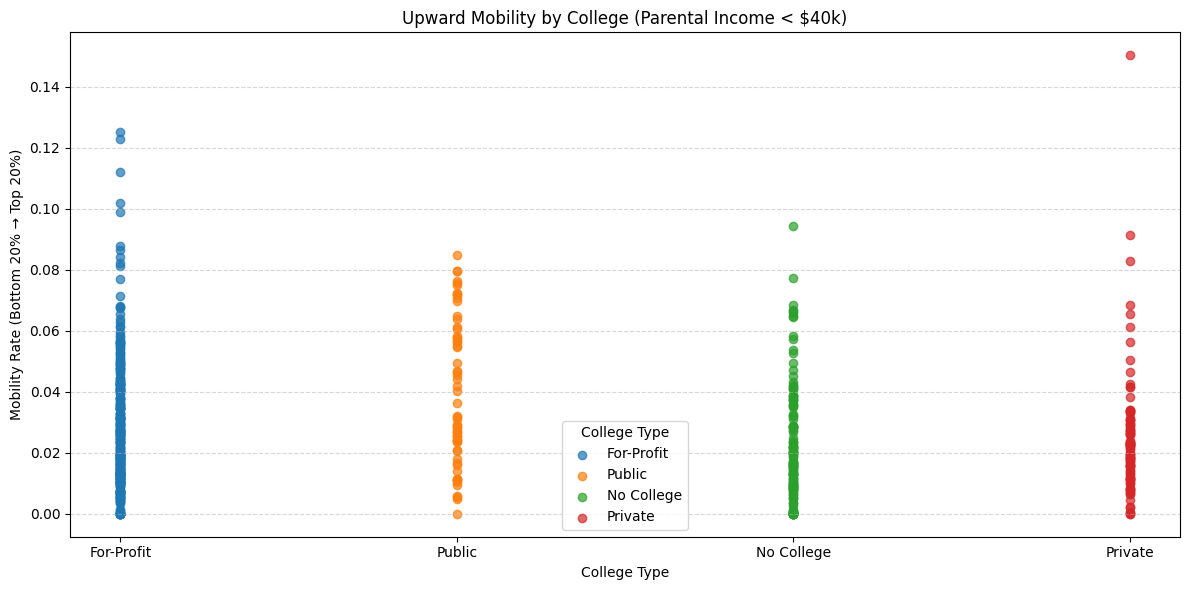

In [4]:
import polars as pl
import matplotlib.pyplot as plt
import pyarrow

# Load dataset
df = read_data("mrc_table3.csv")

# Filter to colleges where average parental income < $40,000
df = df.filter(pl.col("par_mean") < 40000)

# Assign college types based on 'tier'
df = df.with_columns([
    pl.when(pl.col("tier") == 1).then(pl.lit("Ivy-League"))
     .when(pl.col("tier").is_in([3, 5, 7])).then(pl.lit("Public"))
     .when(pl.col("tier").is_in([4, 6, 8])).then(pl.lit("Private"))
     .when(pl.col("tier").is_in([10, 11])).then(pl.lit("For-Profit"))
     .when(pl.col("tier").is_in([12,13,14])).then(pl.lit("No College"))
     .otherwise(None)
     .alias("college_type")
])

# Filter out rows where college_type couldn't be assigned
df_filtered = df.filter(pl.col("college_type").is_not_null())

# Convert to pandas for plotting
df_pd = df_filtered.select(["name", "mr_kq5_pq1", "college_type"]).to_pandas()

# Plot
plt.figure(figsize=(12, 6))
for ctype in df_pd["college_type"].unique():
    sub_df = df_pd[df_pd["college_type"] == ctype]
    plt.scatter(sub_df["college_type"], sub_df["mr_kq5_pq1"], label=ctype, alpha=0.7)

plt.title("Upward Mobility by College (Parental Income < $40k)")
plt.ylabel("Mobility Rate (Bottom 20% → Top 20%)")
plt.xlabel("College Type")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="College Type")
plt.tight_layout()


In [7]:
# Keep only students who attended college
df = df.filter(pl.col("super_opeid") > 0)

# Optional: Focus on a particular cohort (say 1985)
df_1985 = df.filter(pl.col("cohort") == 1985)

# Rename key columns for easy reference
df = df.rename({
    "mr_kq5_pq1": "mobility_rate",
    "mr_ktop1_pq1": "upper_tail_mobility",
    "par_mean": "parent_mean_income",
    "k_mean": "kid_mean_income",
})

# Drop rows with missing values in key columns
df = df.drop_nulls(["mobility_rate", "parent_mean_income", "kid_mean_income"])


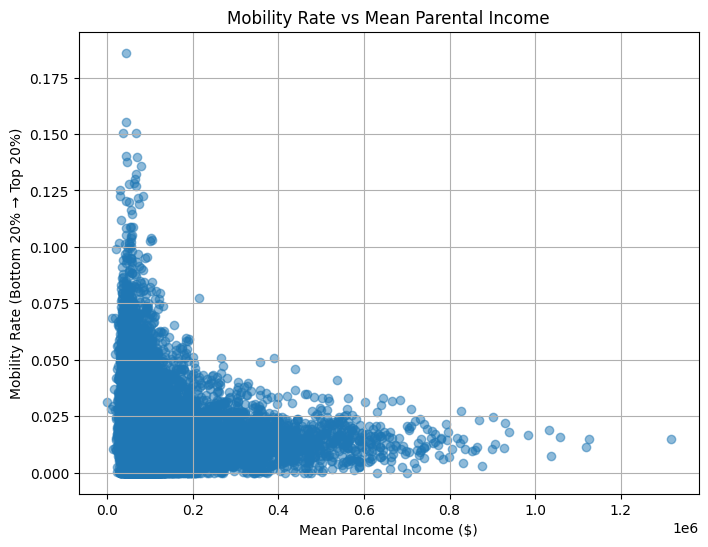

In [8]:
import matplotlib.pyplot as plt

df_pd = df.to_pandas()

plt.figure(figsize=(8,6))
plt.scatter(df_pd["parent_mean_income"], df_pd["mobility_rate"], alpha=0.5)
plt.title("Mobility Rate vs Mean Parental Income")
plt.xlabel("Mean Parental Income ($)")
plt.ylabel("Mobility Rate (Bottom 20% → Top 20%)")
plt.grid(True)
plt.show()


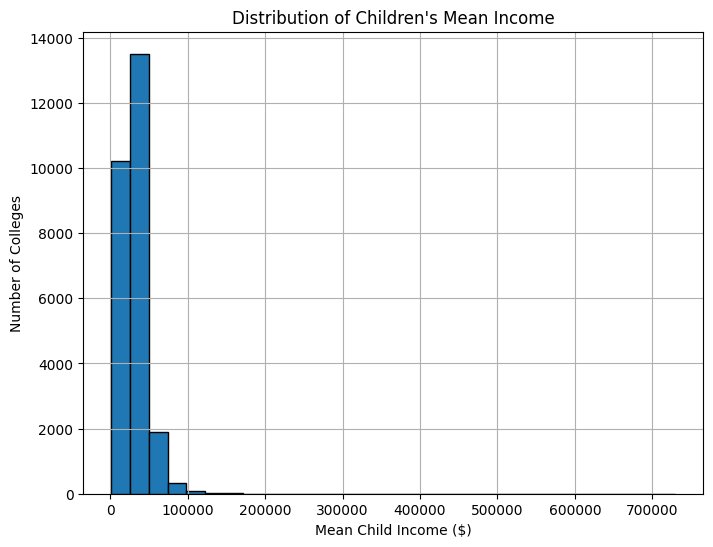

In [9]:
plt.figure(figsize=(8,6))
plt.hist(df_pd["kid_mean_income"], bins=30, edgecolor='black')
plt.title("Distribution of Children's Mean Income")
plt.xlabel("Mean Child Income ($)")
plt.ylabel("Number of Colleges")
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

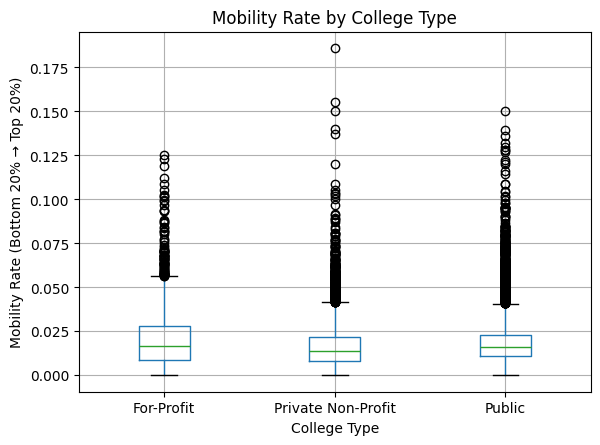

In [10]:
# Map type codes to labels
df_pd["college_type"] = df_pd["type"].map({1: "Public", 2: "Private Non-Profit", 3: "For-Profit"})

# Boxplot
plt.figure(figsize=(8,6))
df_pd.boxplot(column="mobility_rate", by="college_type")
plt.title("Mobility Rate by College Type")
plt.suptitle("")  # Suppress default title
plt.xlabel("College Type")
plt.ylabel("Mobility Rate (Bottom 20% → Top 20%)")
plt.grid(True)
plt.show()

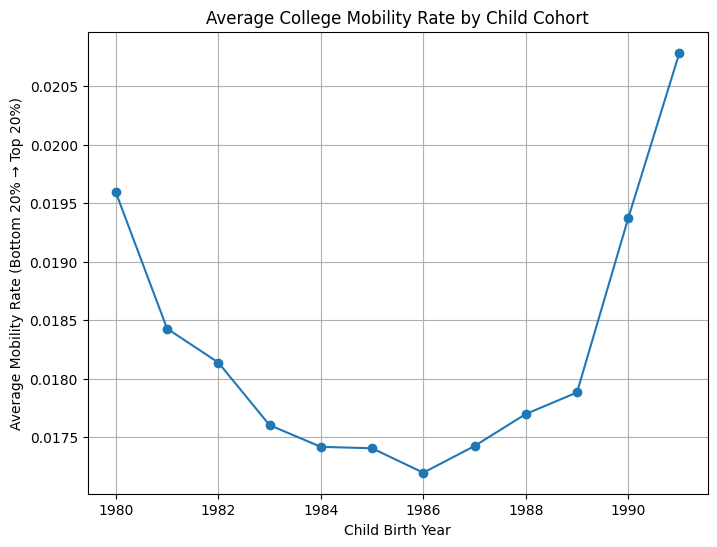

In [15]:
# Group by cohort and compute average mobility
cohort_trend = df.group_by("cohort").agg(
    pl.col("mobility_rate").mean().alias("avg_mobility_rate")
)

# Convert to pandas for plotting
cohort_trend_pd = cohort_trend.sort("cohort").to_pandas()

# Plot
plt.figure(figsize=(8,6))
plt.plot(cohort_trend_pd["cohort"], cohort_trend_pd["avg_mobility_rate"], marker='o')
plt.title("Average College Mobility Rate by Child Cohort")
plt.xlabel("Child Birth Year")
plt.ylabel("Average Mobility Rate (Bottom 20% → Top 20%)")
plt.grid(True)
plt.show()


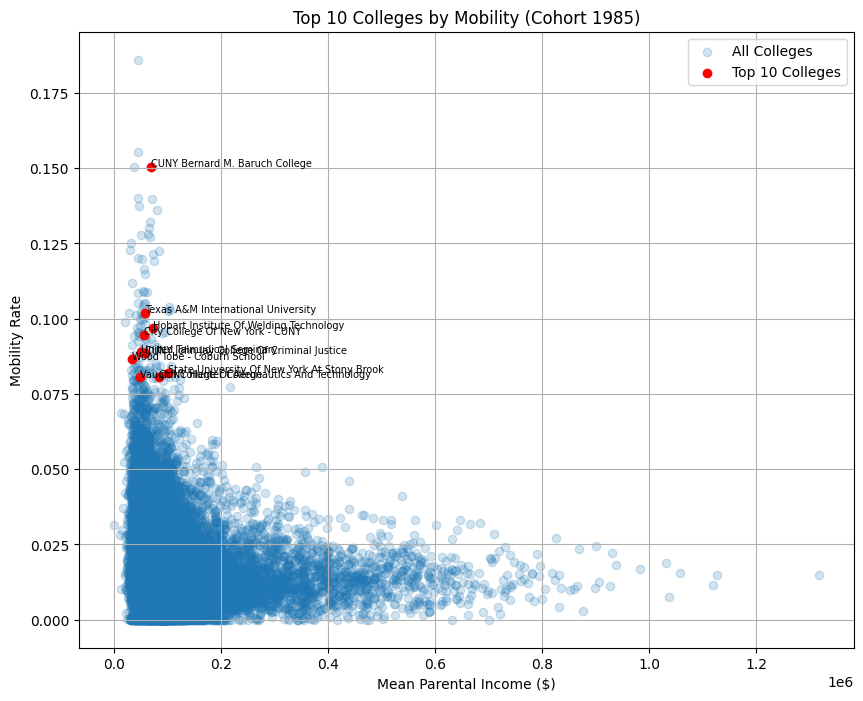

In [16]:
# Top 10 mobility colleges
top10 = df_1985.sort("mobility_rate", descending=True).head(10).to_pandas()

plt.figure(figsize=(10,8))
plt.scatter(df_pd["parent_mean_income"], df_pd["mobility_rate"], alpha=0.2, label="All Colleges")
plt.scatter(top10["parent_mean_income"], top10["mobility_rate"], color='red', label="Top 10 Colleges")

# Annotate
for idx, row in top10.iterrows():
    plt.text(row["parent_mean_income"], row["mobility_rate"], row["name"], fontsize=7)

plt.title("Top 10 Colleges by Mobility (Cohort 1985)")
plt.xlabel("Mean Parental Income ($)")
plt.ylabel("Mobility Rate")
plt.legend()
plt.grid(True)
plt.show()


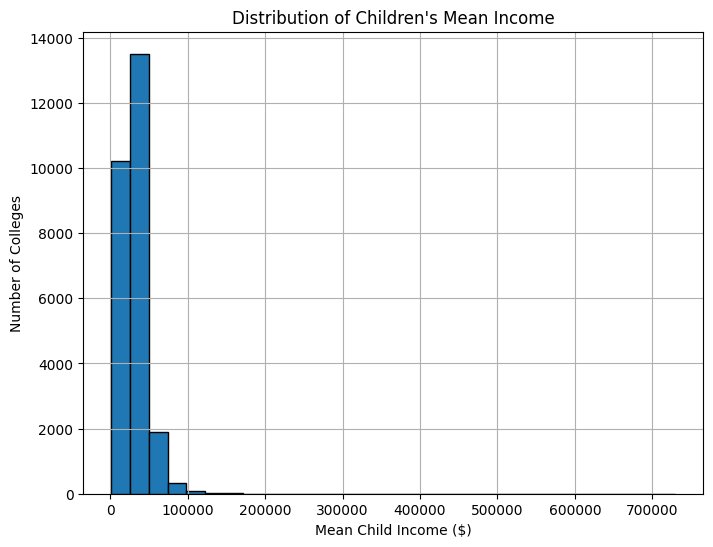

In [21]:
"""
Plot: Histogram of Children's Mean Earnings Across Colleges

Purpose:
- Understand the distribution of average earnings for college students as adults.
- Spot income gaps between colleges.

Steps:
- x-axis: Mean child income.
- y-axis: Number of colleges.
- Histogram with 30 bins.

Usage:
- Identify whether most colleges cluster at low, middle, or high income levels.
- Look for bimodal or skewed distributions.

"""

plt.figure(figsize=(8,6))
plt.hist(df_pd["kid_mean_income"], bins=30, edgecolor='black')
plt.title("Distribution of Children's Mean Income")
plt.xlabel("Mean Child Income ($)")
plt.ylabel("Number of Colleges")
plt.grid(True)
plt.show()


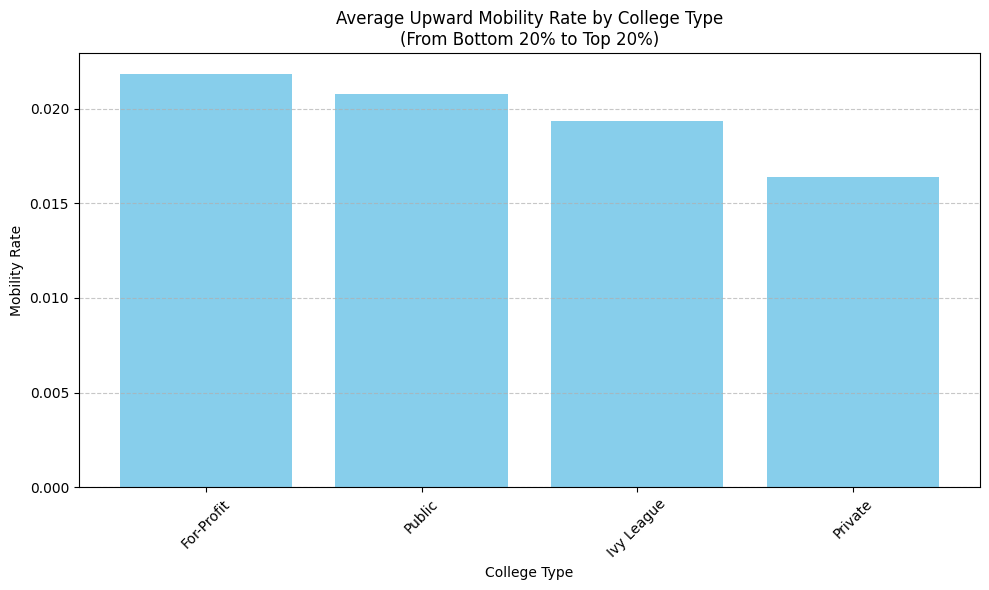

In [23]:
df = pd.read_csv(directory_raw + "mrc_table3.csv")

tier_mapping = {
    1: "Ivy Plus",
    2: "Other Elite",
    3: "Highly Selective Public",
    4: "Highly Selective Private",
    5: "Selective Public",
    6: "Selective Private",
    7: "Nonselective Public",
    8: "Nonselective Private",
    9: "Two-Year Colleges",
    10: "Four-Year For-Profit",
    11: "Two-Year For-Profit",
    12: "Less than Two-Year",
    13: "Insufficient Data",
    14: "Not in College"
}

# Create a new column with tier labels
df["tier_label"] = df["tier"].map(tier_mapping)

# Define the broad categories you want to analyze
category_mapping = {
    "Ivy Plus": "Ivy League",
    "Highly Selective Public": "Public",
    "Selective Public": "Public",
    "Nonselective Public": "Public",
    "Highly Selective Private": "Private",
    "Selective Private": "Private",
    "Nonselective Private": "Private",
    "Four-Year For-Profit": "For-Profit",
    "Two-Year For-Profit": "For-Profit",
}

# Filter to rows we care about and map categories
df = df[df["tier_label"].isin(category_mapping.keys())].copy()
df["college_type"] = df["tier_label"].map(category_mapping)

# Group by college type and calculate mean upward mobility
mobility_by_type = df.groupby("college_type")["mr_kq5_pq1"].mean().reset_index()

# Sort for better visualization
mobility_by_type = mobility_by_type.sort_values("mr_kq5_pq1", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(mobility_by_type["college_type"], mobility_by_type["mr_kq5_pq1"], color='skyblue')
plt.title("Average Upward Mobility Rate by College Type\n(From Bottom 20% to Top 20%)")
plt.ylabel("Mobility Rate")
plt.xlabel("College Type")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

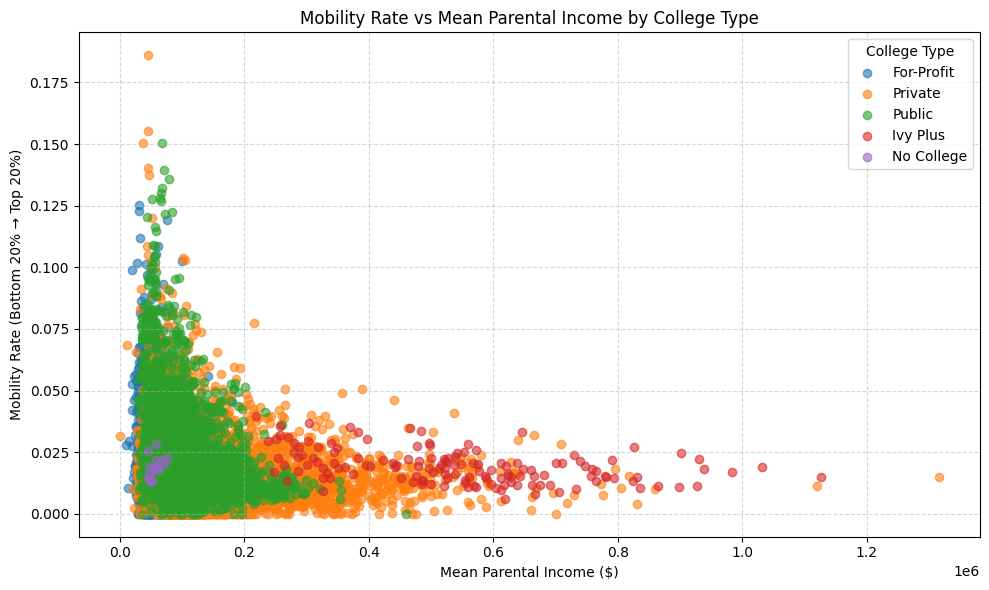

In [48]:
import polars as pl
import matplotlib.pyplot as plt

# STEP 1: Load CSV data
df = read_data("mrc_table3.csv")  # Make sure your file is in the same directory

df = df.with_columns(
    pl.when(pl.col("tier") == 1).then(pl.lit("Ivy Plus"))
    .when(pl.col("tier").is_in([3, 5, 7])).then(pl.lit("Public"))
    .when(pl.col("tier").is_in([4, 6, 8])).then(pl.lit("Private"))
    .when(pl.col("tier").is_in([10, 11])).then(pl.lit("For-Profit"))
    .when(pl.col("tier").is_in([13, 14])).then(pl.lit("No College"))
    .otherwise(pl.lit(None))
    .alias("college_type")
)

# Filter rows with assigned types
df_filtered = df.filter(pl.col("college_type").is_not_null())

# Convert to pandas for plotting
df_pd = df_filtered.select(["par_mean", "mr_kq5_pq1", "college_type"]).to_pandas()

# Scatter plot by college type
plt.figure(figsize=(10, 6))
for ctype in df_pd["college_type"].unique():
    sub_df = df_pd[df_pd["college_type"] == ctype]
    plt.scatter(sub_df["par_mean"], sub_df["mr_kq5_pq1"], label=ctype, alpha=0.6)

plt.title("Mobility Rate vs Mean Parental Income by College Type")
plt.xlabel("Mean Parental Income ($)")
plt.ylabel("Mobility Rate (Bottom 20% → Top 20%)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="College Type")
plt.tight_layout()

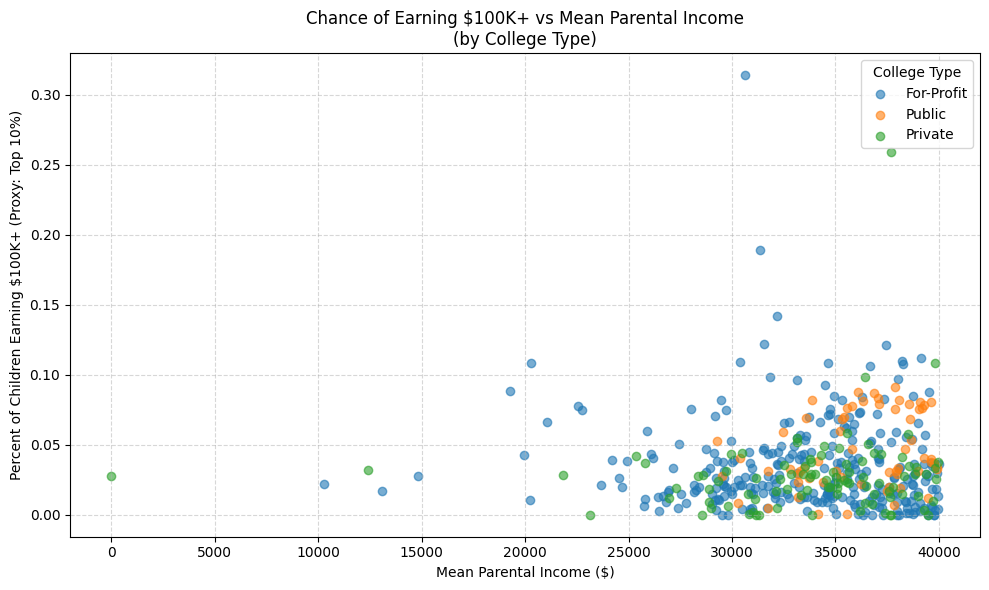

In [35]:
import matplotlib.pyplot as plt

# Convert filtered Polars DataFrame to pandas
df_pd = df_filtered.select(["par_mean", "k_top10pc", "college_type"]).to_pandas()

plt.figure(figsize=(10, 6))
for ctype in df_pd["college_type"].unique():
    sub_df = df_pd[df_pd["college_type"] == ctype]
    plt.scatter(sub_df["par_mean"], sub_df["k_top10pc"], label=ctype, alpha=0.6)

plt.title("Chance of Earning $100K+ vs Mean Parental Income\n(by College Type)")
plt.xlabel("Mean Parental Income ($)")
plt.ylabel("Percent of Children Earning $100K+ (Proxy: Top 10%)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="College Type")
plt.tight_layout()
plt.show()


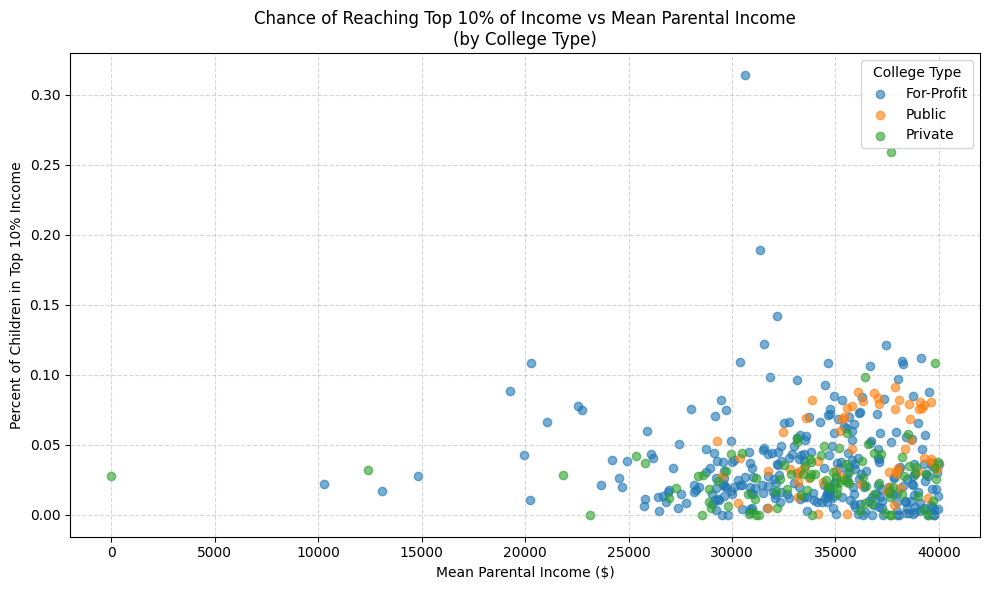

In [34]:
import polars as pl
import matplotlib.pyplot as plt

# STEP 1: Load the dataset
df = read_data("mrc_table3.csv")

# STEP 2: Filter for low parental income (< $40,000), optional
df = df.filter(pl.col("par_mean") < 40000)

# STEP 3: Assign college types using 'tier'
df = df.with_columns(
    pl.when(pl.col("tier") == 1).then(pl.lit("Ivy League"))
     .when(pl.col("tier").is_in([3, 5, 7])).then(pl.lit("Public"))
     .when(pl.col("tier").is_in([4, 6, 8])).then(pl.lit("Private"))
     .when(pl.col("tier").is_in([10, 11])).then(pl.lit("For-Profit"))
     .otherwise(pl.lit(None))
     .alias("college_type")
)

# STEP 4: Filter out rows without a college_type or k_top10pc
df_filtered = df.filter(
    (pl.col("college_type").is_not_null()) &
    (pl.col("k_top10pc").is_not_null())
)

# STEP 5: Convert to pandas for plotting
df_pd = df_filtered.select(["par_mean", "k_top10pc", "college_type"]).to_pandas()

# STEP 6: Plot
plt.figure(figsize=(10, 6))
for ctype in df_pd["college_type"].unique():
    sub_df = df_pd[df_pd["college_type"] == ctype]
    plt.scatter(sub_df["par_mean"], sub_df["k_top10pc"], label=ctype, alpha=0.6)

plt.title("Chance of Reaching Top 10% of Income vs Mean Parental Income\n(by College Type)")
plt.xlabel("Mean Parental Income ($)")
plt.ylabel("Percent of Children in Top 10% Income")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="College Type")
plt.tight_layout()
plt.show()


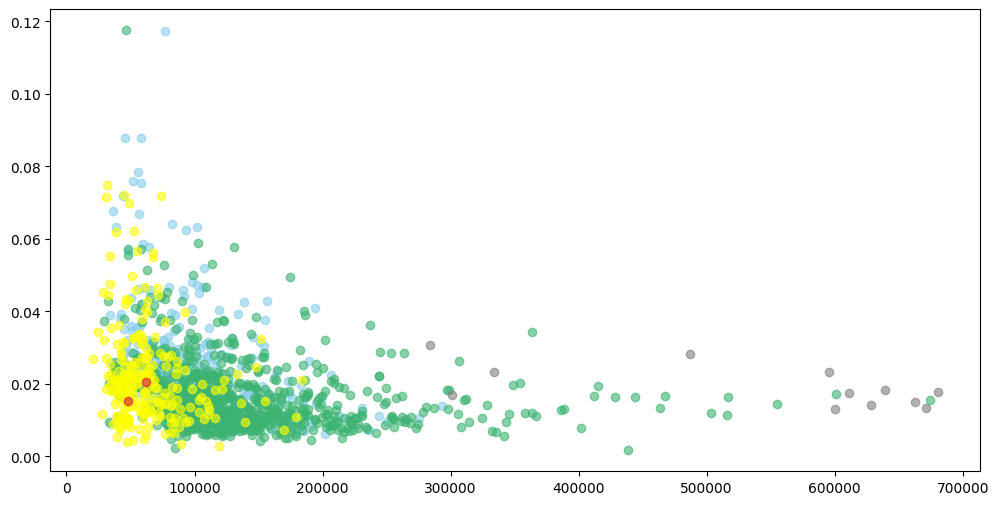

In [70]:
# Define custom colors for each college type
color_map = {
    "Ivy League": "gold",
    "Public": "skyblue",
    "Private": "mediumseagreen",
    "For-Profit": "yellow",
    "No College": "crimson"  # Brighter red to stand out
}

# Plot each group with its custom color
plt.figure(figsize=(12, 6))
for ctype in df_pd["college_type"].unique():
    sub_df = df_pd[df_pd["college_type"] == ctype]
    plt.scatter(
        sub_df["par_mean"],
        sub_df["mr_kq5_pq1"],
        label=ctype,
        alpha=0.6,
        color=color_map.get(ctype, "gray")
    )

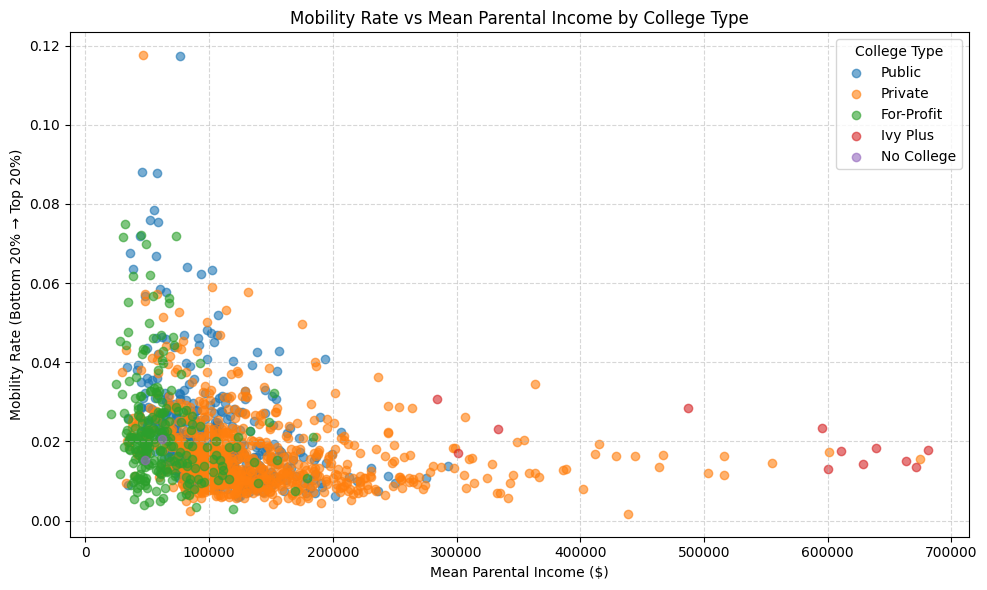

In [ ]:
child_income = read_data(folder='economy', file_name="mrc_table3.csv")

df = child_income.with_columns(
    pl.when(pl.col("tier") == 1).then(pl.lit("Ivy Plus"))
    .when(pl.col("tier").is_in([3, 5, 7])).then(pl.lit("Public"))
    .when(pl.col("tier").is_in([4, 6, 8])).then(pl.lit("Private"))
    .when(pl.col("tier").is_in([10, 11])).then(pl.lit("For-Profit"))
    .when(pl.col("tier").is_in([13, 14])).then(pl.lit("No College"))
    .otherwise(pl.lit(None))
    .alias("college_type")
)

# Filter rows with assigned types
df_filtered = (
    df
    .group_by("name")
    .agg(pl.mean("par_mean").alias("par_mean"), pl.mean("mr_kq5_pq1").alias("mr_kq5_pq1"), pl.first("college_type").alias("college_type"))
    .filter(pl.col("college_type").is_not_null())
    )


# Convert to pandas for plotting
df_pd = df_filtered.select(["par_mean", "mr_kq5_pq1", "college_type"]).to_pandas()

# Scatter plot by college type
plt.figure(figsize=(10, 6))
for ctype in df_pd["college_type"].unique():
    sub_df = df_pd[df_pd["college_type"] == ctype]
    plt.scatter(sub_df["par_mean"], sub_df["mr_kq5_pq1"], label=ctype, alpha=0.6)

plt.title("Mobility Rate vs Mean Parental Income by College Type")
plt.xlabel("Mean Parental Income ($)")
plt.ylabel("Mobility Rate (Bottom 20% → Top 20%)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="College Type")
plt.tight_layout()